CS4001/4042 Assignment 1
---
Part B, Q1 (15 marks)
---

Real world datasets often have a mix of numeric and categorical features – this dataset is one example. To build models on such data, categorical features have to be encoded or embedded.

PyTorch Tabular is a library that makes it very convenient to build neural networks for tabular data. It is built on top of PyTorch Lightning, which abstracts away boilerplate model training code and makes it easy to integrate other tools, e.g. TensorBoard for experiment tracking.

For questions B1 and B2, the following features should be used:   
- **Numeric / Continuous** features: dist_to_nearest_stn, dist_to_dhoby, degree_centrality, eigenvector_centrality, remaining_lease_years, floor_area_sqm
- **Categorical** features: month, town, flat_model_type, storey_range



---



In [2]:
! pip install "pytorch_tabular[extra]"

  Using cached pytorch_tabular-1.1.1-py2.py3-none-any.whl.metadata (24 kB)
  Using cached numpy-1.26.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached pytorch_lightning-2.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached torchmetrics-1.5.2-py3-none-any.whl.metadata (20 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached protobuf-5.28.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached pytorch_tabnet-4.1.0-py3-none-any.whl.metadata (15 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached e

In [3]:
SEED = 42

import os

import random
random.seed(SEED)

import numpy as np
np.random.seed(SEED)

import pandas as pd

import torch
import torch.nn as nn

from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import (
    DataConfig,
    OptimizerConfig,
    TrainerConfig,
)

> Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from year 2020 and before as training data, and year 2021 as test data (validation set is not required).
**Do not** use data from year 2022 and year 2023.



In [4]:
df = pd.read_csv('hdb_price_prediction.csv')
print(f"Dataset shape: {df.shape}")
print(f"Year range: {df['year'].min()} to {df['year'].max()}")

# Split data by year
train_df = df[df['year'] <= 2020]
test_df_2021 = df[df['year'] == 2021]

print(f"Train set (≤2020): {train_df.shape[0]} records")
print(f"Test set (2021): {test_df_2021.shape[0]} records")

Dataset shape: (159553, 14)
Year range: 2017 to 2023
Train set (≤2020): 87370 records
Test set (2021): 29057 records


> Refer to the documentation of **PyTorch Tabular** and perform the following tasks: https://pytorch-tabular.readthedocs.io/en/latest/#usage
- Use **[DataConfig](https://pytorch-tabular.readthedocs.io/en/latest/data/)** to define the target variable, as well as the names of the continuous and categorical variables.
- Use **[TrainerConfig](https://pytorch-tabular.readthedocs.io/en/latest/training/)** to automatically tune the learning rate. Set batch_size to be 1024 and set max_epoch as 50.
- Use **[CategoryEmbeddingModelConfig](https://pytorch-tabular.readthedocs.io/en/latest/models/#category-embedding-model)** to create a feedforward neural network with 1 hidden layer containing 50 neurons.
- Use **[OptimizerConfig](https://pytorch-tabular.readthedocs.io/en/latest/optimizer/)** to choose Adam optimiser. There is no need to set the learning rate (since it will be tuned automatically) nor scheduler.
- Use **[TabularModel](https://pytorch-tabular.readthedocs.io/en/latest/tabular_model/)** to initialise the model and put all the configs together.

In [5]:
print(torch.__version__)

2.2.2


In [6]:
categorical_features = ['month', 'town', 'flat_model_type', 'storey_range']
continuous_features = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 
                      'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
target = ['resale_price']

data_config = DataConfig(
    target=target,
    continuous_cols=continuous_features,
    categorical_cols=categorical_features,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=1024,
    max_epochs=50
)

optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="regression",
    layers="50"
)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

print("Training the PyTorch Tabular model...")
tabular_model.fit(train=train_df)

results = tabular_model.evaluate(test_df_2021)
predictions = tabular_model.predict(test_df_2021)

2025-03-14 23:36:20,551 - {pytorch_tabular.tabular_model:146} - INFO - Experiment Tracking is turned off

Seed set to 42


Training the PyTorch Tabular model...


2025-03-14 23:36:20,580 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-14 23:36:20,608 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

2025-03-14 23:36:20,678 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-14 23:36:20,705 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-14 23:36:20,842 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/saved_models exists and is not empty.
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.6918309709189363
Restoring states from the checkpoint path at /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.lr_find_26475eba-be7d-4ceb-8012-682983fc375a.ckpt
Restored all states from the checkpoint at /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.lr_find_26475eba-be7d-4ceb-8012-682983fc375a.ckpt


2025-03-14 23:36:23,508 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.6918309709189363. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-14 23:36:23,509 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-14 23:36:39,672 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-14 23:36:39,673 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

Output()

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │       5156582400.0        │
│  test_mean_squared_error  │       5156582400.0        │
└───────────────────────────┴───────────────────────────┘

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

> Report the test RMSE error and the test R2 value that you obtained.



In [41]:
import math
from sklearn.metrics import r2_score, mean_squared_error
rmse_2021 = math.sqrt(mean_squared_error(test_df_2021['resale_price'], predictions['resale_price_prediction']))
r2_2021 = r2_score(test_df_2021['resale_price'], predictions['resale_price_prediction'])
print("RMSE: ", rmse_2021)
print("R2: ", r2_2021)

RMSE:  71809.34567038968
R2:  0.8050585528339431


> Print out the corresponding rows in the dataframe for the top 25 test samples with the largest errors. 



In [8]:
test_df_2021['predictions'] = predictions['resale_price_prediction']
test_df_2021['error'] = (test_df_2021['resale_price'] - test_df_2021['predictions'])**2
worst = test_df_2021.sort_values(by=['error'], ascending=False).head(25)
best = test_df_2021.sort_values(by=['error'], ascending=True).head(25)
worst

/var/folders/lm/rqsmrp091ssch6hl2_m2n0h80000gn/T/ipykernel_36702/786438425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_2021['predictions'] = predictions['resale_price_prediction']
/var/folders/lm/rqsmrp091ssch6hl2_m2n0h80000gn/T/ipykernel_36702/786438425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df_2021['error'] = (test_df_2021['resale_price'] - test_df_2021['predictions'])**2


,month,year,town,full_address,nearest_stn,dist_to_nearest_stn,dist_to_dhoby,degree_centrality,eigenvector_centrality,flat_model_type,remaining_lease_years,floor_area_sqm,storey_range,resale_price,predictions,error
90251,4,2021,BISHAN,454 SIN MING AVENUE,Marymount,1.459009,6.840152,0.016807,0.013555,"EXECUTIVE, Maisonette",67.666667,243.0,10 TO 12,1001000.0,1.367026e+06,1.339750e+11
92405,11,2021,BUKIT MERAH,46 SENG POH ROAD,Tiong Bahru,0.581977,2.309477,0.016807,0.047782,"3 ROOM, Standard",50.166667,88.0,01 TO 03,780000.0,4.417082e+05,1.144414e+11
112128,12,2021,TAMPINES,156 TAMPINES STREET 12,Tampines,0.370873,12.479752,0.033613,0.000229,"EXECUTIVE, Maisonette",61.750000,148.0,01 TO 03,998000.0,6.739124e+05,1.050327e+11
90957,6,2021,BUKIT BATOK,288A BUKIT BATOK STREET 25,Bukit Batok,1.292540,10.763777,0.016807,0.000217,"EXECUTIVE, Apartment",75.583333,144.0,10 TO 12,968000.0,6.474819e+05,1.027319e+11
90608,12,2021,BISHAN,273B BISHAN STREET 24,Bishan,0.776182,6.297489,0.033613,0.015854,"5 ROOM, DBSS",88.833333,120.0,37 TO 39,1360000.0,1.043350e+06,1.002673e+11
92442,11,2021,BUKIT MERAH,127D KIM TIAN ROAD,Tiong Bahru,0.686789,2.664024,0.016807,0.047782,"5 ROOM, Improved",90.333333,113.0,16 TO 18,1165000.0,8.700770e+05,8.697958e+10
90521,10,2021,BISHAN,237 BISHAN STREET 22,Bishan,0.947205,6.663943,0.033613,0.015854,"5 ROOM, Improved",69.583333,121.0,07 TO 09,988000.0,6.936112e+05,8.666477e+10
98379,12,2021,HOUGANG,615 HOUGANG AVENUE 8,Hougang,0.899849,8.828235,0.016807,0.001507,"EXECUTIVE, Apartment",63.666667,142.0,04 TO 06,873000.0,5.816306e+05,8.489615e+10
90432,8,2021,BISHAN,275A BISHAN STREET 24,Bishan,0.827889,6.370404,0.033613,0.015854,"5 ROOM, DBSS",88.916667,120.0,25 TO 27,1280000.0,9.891364e+05,8.460161e+10
88081,8,2021,ANG MO KIO,310A ANG MO KIO AVENUE 1,Ang Mo Kio,0.860056,7.263401,0.016807,0.006243,"5 ROOM, Improved",90.166667,121.0,28 TO 30,1100000.0,8.112856e+05,8.335603e+10


Part B, Q2 (10 marks)
---
In Question B1, we used the Category Embedding model. This creates a feedforward neural network in which the categorical features get learnable embeddings. In this question, we will make use of a library called Pytorch-WideDeep. This library makes it easy to work with multimodal deep-learning problems combining images, text, and tables. We will just be utilizing the deeptabular component of this library through the TabMlp network.

In [9]:
! pip install pytorch-widedeep

  Using cached pytorch_widedeep-1.6.5-py3-none-any.whl.metadata (10 kB)
  Using cached scipy-1.12.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (112 kB)
  Using cached gensim-4.3.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.2 kB)
  Using cached spacy-3.8.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyarrow-19.0.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (3.3 kB)
  Using cached fastparquet-2024.11.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.2 kB)
  Using cached transformers-4.49.0-py3-none-any.whl.metadata (44 kB)
  Using cached sentence_transformers-3.4.1-py3-none-any.whl.metadata (10 kB)
  Using cached sentencepiece-0.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached cramjam-2.9.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.9 kB)
  Using cached huggingface_hu

In [10]:
from pytorch_widedeep.preprocessing import TabPreprocessor
from pytorch_widedeep.models import TabMlp, WideDeep
from pytorch_widedeep import Trainer
from pytorch_widedeep.metrics import R2Score

>Divide the dataset (‘hdb_price_prediction.csv’) into train and test sets by using entries from the year 2020 and before as training data, and entries from 2021 and after as the test data（validation set is not required here).

In [11]:
df = pd.read_csv('hdb_price_prediction.csv')
train_df_b2 = df[df['year'] <= 2020].copy()
test_df_b2 = df[df['year'] >= 2021].copy()
print(f"Train set (≤2020): {train_df.shape[0]} records")
print(f"Test set (≥2021): {test_df_b2.shape[0]} records")

Train set (≤2020): 87370 records
Test set (≥2021): 72183 records


>Refer to the documentation of Pytorch-WideDeep and perform the following tasks:
https://pytorch-widedeep.readthedocs.io/en/latest/index.html
* Use [**TabPreprocessor**](https://pytorch-widedeep.readthedocs.io/en/latest/examples/01_preprocessors_and_utils.html#2-tabpreprocessor) to create the deeptabular component using the continuous
features and the categorical features. Use this component to transform the training dataset.
* Create the [**TabMlp**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/model_components.html#pytorch_widedeep.models.tabular.mlp.tab_mlp.TabMlp) model with 2 hidden layers in the MLP, with 200 and 100 neurons respectively.
* Create a [**Trainer**](https://pytorch-widedeep.readthedocs.io/en/latest/pytorch-widedeep/trainer.html#pytorch_widedeep.training.Trainer) for the training of the created TabMlp model with the root mean squared error (RMSE) cost function. Train the model for 60 epochs using this trainer, keeping a batch size of 64. (Note: set the *num_workers* parameter to 0.)

In [18]:
tab_preprocessor = TabPreprocessor(
    cat_embed_cols=categorical_features,
    continuous_cols=continuous_features
)

X_tab_train = tab_preprocessor.fit_transform(train_df_b2)
X_tab_test = tab_preprocessor.transform(test_df_b2)

tab_mlp = TabMlp(
    column_idx=tab_preprocessor.column_idx,
    mlp_hidden_dims=[200, 100],
    cat_embed_dropout=0.1,
    cat_embed_input=tab_preprocessor.cat_embed_input,
    continuous_cols=continuous_features
)

model = WideDeep(deeptabular=tab_mlp)

trainer = Trainer(
    model,
    objective="regression",
    lr=0.001,
    metrics=[R2Score],
    batch_size=64,
    num_workers=0
)

# Train the model
print("Training the PyTorch-WideDeep model...")
trainer.fit(
    X_tab=X_tab_train,
    target=train_df_b2['resale_price'],
    n_epochs=60,
    batch_size=64,
)

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_widedeep/preprocessing/tab_preprocessor.py:364: UserWarning: Continuous columns will not be normalised
  warnings.warn("Continuous columns will not be normalised")


Training the PyTorch-WideDeep model...


epoch 60: 100%|██████████| 1366/1366 [00:13<00:00, 97.95it/s, loss=2.33e+9, metrics={'r2': 0.902}]  


>Report the test RMSE and the test R2 value that you obtained.

In [20]:
preds = trainer.predict(X_tab=X_tab_test)
y_test = test_df_b2['resale_price']
rmse_b2 = np.sqrt(mean_squared_error(y_test, preds))
r2_b2 = r2_score(y_test, preds)

print(f"\nB2 Results on Test Set (≥2021):")
print(f"RMSE: {rmse_b2:.2f}")
print(f"R² Score: {r2_b2:.4f}")

predict: 100%|██████████| 1128/1128 [00:02<00:00, 403.39it/s]



B2 Results on Test Set (≥2021):
RMSE: 101053.34
R² Score: 0.6432


Part B, Q3 (10 marks)
---
Besides ensuring that your neural network performs well, it is important to be able to explain the model’s decision. **Captum** is a very handy library that helps you to do so for PyTorch models.

Many model explainability algorithms for deep learning models are available in Captum. These algorithms are often used to generate an attribution score for each feature. Features with larger scores are more ‘important’ and some algorithms also provide information about directionality (i.e. a feature with very negative attribution scores means the larger the value of that feature, the lower the value of the output).

In general, these algorithms can be grouped into two paradigms:
- **perturbation based approaches** (e.g. Feature Ablation)
- **gradient / backpropagation based approaches** (e.g. Saliency)

The former adopts a brute-force approach of removing / permuting features one by one and does not scale up well. The latter depends on gradients and they can be computed relatively quickly. But unlike how backpropagation computes gradients with respect to weights, gradients here are computed **with respect to the input**. This gives us a sense of how much a change in the input affects the model’s outputs.




---



In [21]:
! pip install captum

In [27]:
from captum.attr import Saliency, InputXGradient, IntegratedGradients, GradientShap, FeatureAblation, DeepLift

> First, use the train set (year 2020 and before) and test set (year 2021) following the splits in Question B1 (validation set is not required here). To keep things simple, we will **limit our analysis to numeric / continuous features only**. Drop all categorical features from the dataframes. Standardise the features via **StandardScaler** (fit to training set, then transform all).

In [33]:
from common_utils import preprocess_dataset

df = pd.read_csv('hdb_price_prediction.csv')

train_dataset = df[df['year'] <= 2020].copy()
test_dataset = df[df['year'] == 2021].copy()

continuous_features = ['dist_to_nearest_stn', 'dist_to_dhoby', 'degree_centrality', 
                      'eigenvector_centrality', 'remaining_lease_years', 'floor_area_sqm']
target = 'resale_price'

# Extract continuous features and target
X_train = train_dataset[continuous_features].copy()
y_train = train_dataset[target].copy()
X_test = test_dataset[continuous_features].copy()
y_test = test_dataset[target].copy()

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

X_train_scaled, X_test_scaled = preprocess_dataset(X_train, X_test)

Training data shape: (87370, 6)
Testing data shape: (29057, 6)


> Follow this tutorial to generate the plot from various model explainability algorithms (https://captum.ai/tutorials/House_Prices_Regression_Interpret).
Specifically, make the following changes:
- Use a feedforward neural network with 3 hidden layers, each having 5 neurons. Train using Adam optimiser with learning rate of 0.001.
- Use Input x Gradients, Integrated Gradients, DeepLift, GradientSHAP, Feature Ablation. To avoid long running time, you can limit the analysis to the first 1000 samples in test set.

In [34]:
class FFNeuralNet(nn.Module):
    def __init__(self, input_size):
        super(FFNeuralNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 5),
            nn.ReLU(),
            nn.Linear(5, 1)
        )
    
    def forward(self, x):
        return self.layers(x)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

datasets = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(datasets, batch_size=64, shuffle=True)

model = FFNeuralNet(len(continuous_features))
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, num_epochs=200):
    print("Training the model...")
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * len(X_batch)
        
        if epoch % 20 == 0:
            model.eval()
            with torch.no_grad():
                train_pred = model(X_train_tensor)
                train_loss = loss_fn(train_pred, y_train_tensor).item()
                val_pred = model(X_test_tensor)
                val_loss = loss_fn(val_pred, y_test_tensor).item()
                print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.2f}, Validation Loss: {val_loss:.2f}")

train_model(model, 200)

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_mse = loss_fn(y_pred, y_test_tensor).item()
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test_tensor.numpy(), y_pred.numpy())

Training the model...
Epoch 1/200 - Train Loss: 214808428544.00, Validation Loss: 282384990208.00
Epoch 21/200 - Train Loss: 4014323712.00, Validation Loss: 7975342592.00
Epoch 41/200 - Train Loss: 3579347200.00, Validation Loss: 7559276544.00
Epoch 61/200 - Train Loss: 3475737856.00, Validation Loss: 7328385024.00
Epoch 81/200 - Train Loss: 3430372096.00, Validation Loss: 7223565312.00
Epoch 101/200 - Train Loss: 3404675328.00, Validation Loss: 7196651520.00
Epoch 121/200 - Train Loss: 3381265920.00, Validation Loss: 7232557056.00
Epoch 141/200 - Train Loss: 3366855168.00, Validation Loss: 7210760704.00
Epoch 161/200 - Train Loss: 3355272960.00, Validation Loss: 7149676544.00
Epoch 181/200 - Train Loss: 3348392704.00, Validation Loss: 7308129280.00

Model Performance:
RMSE: $84950.77
R² Score: 0.7272


In [35]:
print(f"\nModel Performance:")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.4f}")


Model Performance:
RMSE: 84950.77
R² Score: 0.7272


In [36]:
n_explain_samples = min(1000, X_test_tensor.shape[0])
X_subset = X_test_tensor[:n_explain_samples]

input_x_gradient = InputXGradient(model)
integrated_gradients = IntegratedGradients(model)
deep_lift = DeepLift(model)
gradient_shap = GradientShap(model)
feature_ablation = FeatureAblation(model)

attributions = {}
print("\nComputing feature attributions with different methods...")

attributions['Input x Gradient'] = input_x_gradient.attribute(X_subset).detach().numpy()
attributions['Integrated Gradients'] = integrated_gradients.attribute(X_subset, n_steps=50).detach().numpy()
attributions['DeepLift'] = deep_lift.attribute(X_subset).detach().numpy()
baseline = torch.zeros((1, X_subset.shape[1]))
attributions['GradientSHAP'] = gradient_shap.attribute(X_subset, baselines=baseline).detach().numpy()
attributions['Feature Ablation'] = feature_ablation.attribute(X_subset).detach().numpy()

mean_attributions = {
    method: np.abs(attr).mean(axis=0) for method, attr in attributions.items()
}


Computing feature attributions with different methods...


/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


> Read the following [descriptions](https://captum.ai/docs/attribution_algorithms) and [comparisons](https://captum.ai/docs/algorithms_comparison_matrix) in Captum to build up your understanding of the difference of various explainability algorithms. Based on your plot, identify the three most important features for regression. Explain how each of these features influences the regression outcome.


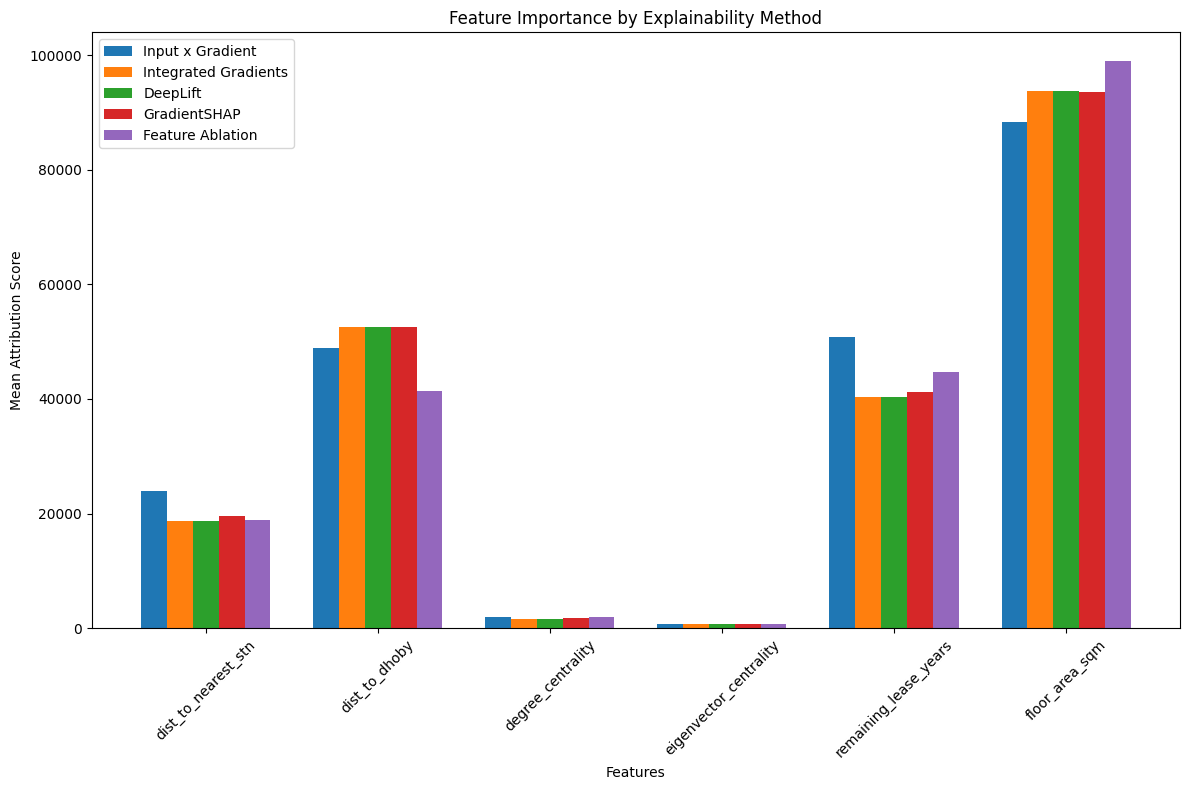


Top three most important features:
1. floor_area_sqm: 93637.0416
2. dist_to_dhoby: 49590.1630
3. remaining_lease_years: 43499.1142

Feature impact direction analysis:
- dist_to_nearest_stn: positive correlation with price (avg raw attr: 12930.8172)
- dist_to_dhoby: positive correlation with price (avg raw attr: 49480.6567)
- degree_centrality: negative correlation with price (avg raw attr: -1292.0199)
- eigenvector_centrality: positive correlation with price (avg raw attr: 744.1016)
- remaining_lease_years: negative correlation with price (avg raw attr: -13936.4849)
- floor_area_sqm: negative correlation with price (avg raw attr: -37378.2451)


In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
x = range(len(continuous_features))
width = 0.15
offset = 0

for i, (method, attr) in enumerate(mean_attributions.items()):
    plt.bar([p + offset for p in x], attr, width, label=method)
    offset += width

plt.xlabel('Features')
plt.ylabel('Mean Attribution Score')
plt.title('Feature Importance by Explainability Method')
plt.xticks([i + 0.3 for i in x], continuous_features, rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('feature_attributions.png')
plt.show()

avg_attributions = np.mean([attr for attr in mean_attributions.values()], axis=0)
top_features_idx = np.argsort(avg_attributions)[::-1][:3]
top_features = [continuous_features[i] for i in top_features_idx]

print(f"\nTop three most important features:")
for i, feature in enumerate(top_features):
    print(f"{i+1}. {feature}: {avg_attributions[top_features_idx[i]]:.4f}")

print("\nFeature impact direction analysis:")
for feature_idx, feature in enumerate(continuous_features):
    avg_raw_attr = np.mean([attributions[method][:, feature_idx].mean() for method in attributions])
    direction = "positive" if avg_raw_attr > 0 else "negative"
    print(f"- {feature}: {direction} correlation with price (avg raw attr: {avg_raw_attr:.4f})")

\# TODO: \<Enter your answer here\>

Part B, Q4 (10 marks)
---

Model degradation is a common issue faced when deploying machine learning models (including neural networks) in the real world. New data points could exhibit a different pattern from older data points due to factors such as changes in government policy or market sentiments. For instance, housing prices in Singapore have been increasing and the Singapore government has introduced 3 rounds of cooling measures over the past years (16 December 2021, 30 September 2022, 27 April 2023).

In such situations, the distribution of the new data points could differ from the original data distribution which the models were trained on. Recall that machine learning models often work with the assumption that the test distribution should be similar to train distribution. When this assumption is violated, model performance will be adversely impacted.  In the last part of this assignment, we will investigate to what extent model degradation has occurred.




---



In [38]:
! pip install alibi-detect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 6.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 7.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 7.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.1.0
    Uninstalling pillow-11.1.0:
      Successfully uninstalled pillow-11.1.0
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.44.0
    Uninstalling llvmlite-0.44.0:
      Successfully uninstalled llvmlite-0.44.0
  Attempting uninstall: numba
    Found existing installation: numba 0.61.0
    Uninstalling numba-0.61.0:
      Successfully uninstalled numba-0.61.0


In [39]:
from alibi_detect.cd import TabularDrift

> Evaluate your model from B1 on data from year 2022 and report the test R2.

In [42]:
df = pd.read_csv('hdb_price_prediction.csv')

In [43]:
test_df_2022 = df[df['year'] == 2022].copy() 
pred_df_2022 = tabular_model.predict(test_df_2022)
test_preds_2022 = pred_df_2022[target + "_prediction"].values
test_actuals_2022 = test_df_2022[target].values
rmse_2022 = np.sqrt(mean_squared_error(test_actuals_2022, test_preds_2022))
r2_2022 = r2_score(test_actuals_2022, test_preds_2022)

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



> Evaluate your model from B1 on data from year 2023 and report the test R2.

In [44]:
test_df_2023 = df[df['year'] == 2023].copy()
pred_df_2023 = tabular_model.predict(test_df_2023)
test_preds_2023 = pred_df_2023[target + "_prediction"].values
test_actuals_2023 = test_df_2023[target].values
rmse_2023 = np.sqrt(mean_squared_error(test_actuals_2023, test_preds_2023))
r2_2023 = r2_score(test_actuals_2023, test_preds_2023)

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



> Did model degradation occur for the deep learning model?

In [46]:
print(f"Model Performance Across Years:")
print(f"2021 - RMSE: {rmse_2021:.2f}, R²: {r2_2021:.4f}")
print(f"2022 - RMSE: {rmse_2022:.2f}, R²: {r2_2022:.4f}")
print(f"2023 - RMSE: {rmse_2023:.2f}, R²: {r2_2023:.4f}")

Model Performance Across Years:
2021 - RMSE: 71809.35, R²: 0.8051
2022 - RMSE: 125558.47, R²: 0.4562
2023 - RMSE: 158672.96, R²: 0.1460


Yes, model degradation occurred. The R2 value dropped from 0.8051 for 2021 test data(in B1) to 0.4562 for 2022 test data, to 0.1460 for 2023 test data.

Model degradation could be caused by [various data distribution shifts](https://huyenchip.com/2022/02/07/data-distribution-shifts-and-monitoring.html#data-shift-types): covariate shift (features), label shift and/or concept drift (altered relationship between features and labels).
There are various conflicting terminologies in the [literature](https://www.sciencedirect.com/science/article/pii/S0950705122002854#tbl1). Let’s stick to this reference for this assignment.

> Using the **Alibi Detect** library, apply the **TabularDrift** function with the training data (year 2020 and before) used as the reference and **detect which features have drifted** in the 2023 test dataset. Before running the statistical tests, ensure you **sample 1000 data points** each from the train and test data. Do not use the whole train/test data. (Hint: use this example as a guide https://docs.seldon.io/projects/alibi-detect/en/stable/examples/cd_chi2ks_adult.html)


In [51]:
np.random.seed(SEED)

train_drift = df[df['year'] <= 2020].copy()
test_drift_2023 = df[df['year'] == 2023].copy()

columns_to_use = continuous_features + categorical_features
train_drift = train_drift[columns_to_use].copy()
test_drift = test_drift_2023[columns_to_use].copy()

train_sample = train_drift.sample(1000, random_state=SEED)
test_sample = test_drift.sample(min(1000, test_drift.shape[0]), random_state=SEED)

print(f"Train sample shape: {train_sample.shape}")
print(f"Test sample shape: {test_sample.shape}")

cat_features_idx = [i for i, col in enumerate(columns_to_use) if col in categorical_features]
print(f"Categorical feature indices: {cat_features_idx}")

drift_detector = TabularDrift(
    train_sample.values,
    p_val=0.05,
    categories_per_feature={i: None for i in cat_features_idx}
)

print(f"\nChecking for data drift between train (≤2020) and 2023 data...")
drift_preds = drift_detector.predict(test_sample.values, drift_type='feature')
is_drift = drift_preds['data']['is_drift']
p_vals = drift_preds['data']['p_val']

print(f"Overall drift detected: {is_drift}")
print("\nFeatures with significant drift (p-value < 0.05):")

feature_scores = dict(zip(columns_to_use, p_vals))
drifted_features = {feat: p_val for feat, p_val in feature_scores.items() if p_val < 0.05}
for feat, p_val in sorted(drifted_features.items(), key=lambda x: x[1]):
    print(f"{feat}: p-value = {p_val:.4f}")

Train sample shape: (1000, 10)
Test sample shape: (1000, 10)
Categorical feature indices: [6, 7, 8, 9]

Checking for data drift between train (≤2020) and 2023 data...
Overall drift detected: [1 0 0 0 1 0 1 0 0 1]

Features with significant drift (p-value < 0.05):
month: p-value = 0.0000
remaining_lease_years: p-value = 0.0000
dist_to_nearest_stn: p-value = 0.0106
storey_range: p-value = 0.0308


> Assuming that the flurry of housing measures have made an impact on the relationship between all the features and resale_price (i.e. P(Y|X) changes), which type of data distribution shift possibly led to model degradation?

Model degradation occurred due to concept drift. Concept drift happens when the relationship between the input and the output — represented by P(Y|X) — changes, even though the input distribution, P(X), stays the same. Also called posterior shift, this means that while the inputs remain consistent, the way they influence the output shifts. In this situation, government-implemented cooling measures in the housing market have changed how various features relate to the resale price.

> From your analysis via TabularDrift, which features contribute to this shift?

From my analysis above, 'month', 'remaining_lease_years', 'dist_to_nearest_stn' and 'storey_range' have drifted and contributed to the shift. These features have p value <= 0.05.

> Suggest 1 way to address model degradation and implement it, showing improved test R2 for year 2023.

To address model degradation in the HDB price prediction model, I implemented a fine-tuning approach that leverages more recent data to update the model's parameters. By retraining the model on combined 2021-2022 data (while preserving the model architecture and learned representations), the approach effectively adapts the model to capture newer market trends and changing relationships between features and housing prices. The results demonstrate remarkable improvement: the model's performance on 2023 data increased from an R² of 0.1460 to 0.7928 (an improvement of 0.6468), while RMSE decreased from 158,672.96 to 78,152.52. This dramatic enhancement illustrates how fine-tuning addresses concept drift in real estate markets, where government cooling measures and shifting economic conditions can rapidly change the pricing dynamics. By incorporating more recent historical data, the model successfully bridges the temporal gap between the original training data and current market conditions, providing much more reliable predictions for current housing prices.

In [53]:
print("\nAddressing model degradation by fine-tuning the model on recent data...")

fine_tune_df = pd.concat([test_df_2021, test_df_2022])

tabular_model.fit(train=fine_tune_df)

pred_df_2023_ft = tabular_model.predict(test_df_2023)
test_preds_2023_ft = pred_df_2023_ft[target + "_prediction"].values
rmse_2023_ft = np.sqrt(mean_squared_error(test_actuals_2023, test_preds_2023_ft))
r2_2023_ft = r2_score(test_actuals_2023, test_preds_2023_ft)

Seed set to 42



Addressing model degradation by fine-tuning the model on recent data...


2025-03-15 04:56:07,190 - {pytorch_tabular.tabular_model:548} - INFO - Preparing the DataLoaders

2025-03-15 04:56:07,218 - {pytorch_tabular.tabular_datamodule:522} - INFO - Setting up the datamodule for          
regression task

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

2025-03-15 04:56:07,266 - {pytorch_tabular.tabular_model:599} - INFO - Preparing the Model: CategoryEmbeddingModel

2025-03-15 04:56:07,283 - {pytorch_tabular.tabular_model:342} - INFO - Preparing the Trainer

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


2025-03-15 04:56:07,297 - {pytorch_tabular.tabular_model:656} - INFO - Auto LR Find Started

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/saved_models exists and is not empty.
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (44) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
/Users/aryansethi/Documen

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.8317637711026709
Restoring states from the checkpoint path at /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.lr_find_e664e4f0-3a3a-4f7b-bc80-69b910e15030.ckpt
Restored all states from the checkpoint at /Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.lr_find_e664e4f0-3a3a-4f7b-bc80-69b910e15030.ckpt


2025-03-15 04:56:09,055 - {pytorch_tabular.tabular_model:669} - INFO - Suggested LR: 0.8317637711026709. For plot  
and detailed analysis, use `find_learning_rate` method.

2025-03-15 04:56:09,057 - {pytorch_tabular.tabular_model:678} - INFO - Training Started

┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type                      ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _backbone        │ CategoryEmbeddingBackbone │  3.0 K │ train │
│ 1 │ _embedding_layer │ Embedding1dLayer          │  1.6 K │ train │
│ 2 │ head             │ LinearHead                │     51 │ train │
│ 3 │ loss             │ MSELoss                   │      0 │ train │
└───┴──────────────────┴───────────────────────────┴────────┴───────┘

Trainable params: 4.6 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 4.6 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 16                                                                                          
Modules in eval mode: 0

Output()

2025-03-15 04:56:29,235 - {pytorch_tabular.tabular_model:689} - INFO - Training the model completed

2025-03-15 04:56:29,236 - {pytorch_tabular.tabular_model:1529} - INFO - Loading the best model

/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/tabular_model.py:1466: DeprecationWarning: `include_input_features` will be deprecated in the next release. Please add index columns to the test dataframe if you want to retain some features like the key or id
  warnings.warn(
/Users/aryansethi/Documents/Personal/Neural-Networks-Assignment-1/.venv/lib/python3.10/site-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



In [55]:
print(f"\nFine-tuned Model Performance on 2023 data:")
print(f"Before fine-tuning - RMSE: {rmse_2023:.2f}, R²: {r2_2023:.4f}")
print(f"After fine-tuning - RMSE: {rmse_2023_ft:.2f}, R²: {r2_2023_ft:.4f}")
print(f"Improvement in R²: {r2_2023_ft - r2_2023:.4f}")


Fine-tuned Model Performance on 2023 data:
Before fine-tuning - RMSE: 158672.96, R²: 0.1460
After fine-tuning - RMSE: 78152.52, R²: 0.7928
Improvement in R²: 0.6468
